In [1]:
# add necessary Julia toolbox

using Plots
using LinearAlgebra
using Random
using ImageFiltering
using Statistics

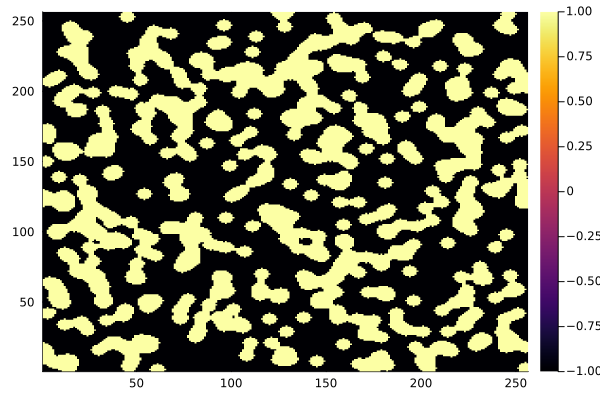

In [2]:
include("generate_synthetic_data.jl")

im = generate_synthetic_data(l_x = 256, n_pts = 500)
im = im .- 0.5
im = 2*im

heatmap(im)

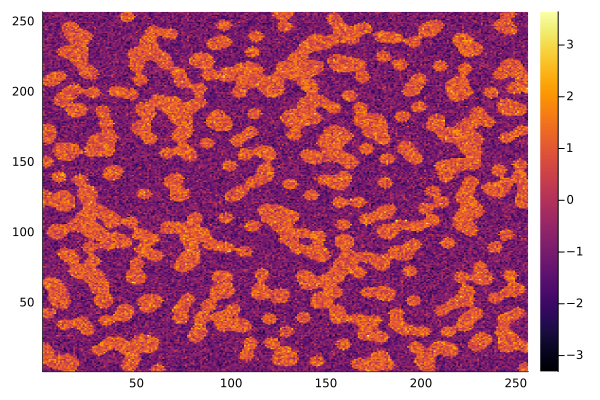

In [3]:
# add noise to image

noisy_im = im + 0.6 * randn( Float64, size(im) )

heatmap( noisy_im )

In [4]:
include("compute_pixel_to_factors.jl")
include("BP_mrf.jl")

J = 1
results_bp = sign.( BP_mrf( noisy_im, J, n_steps = 50 ) )
errors_bp = (!).( results_bp .== im )

println( "fraction of errors: $(mean(errors_bp))" )

fraction of errors: 0.0089263916015625


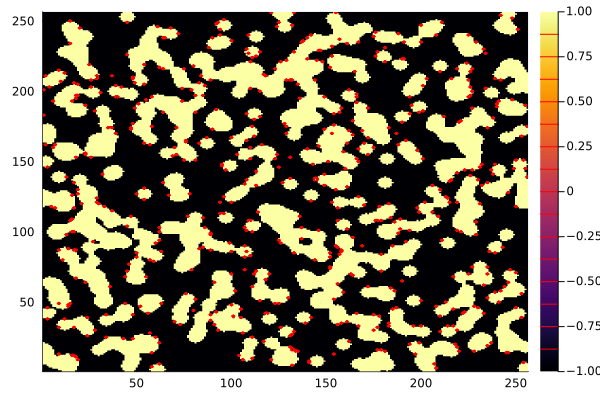

In [5]:
heatmap( results_bp )
contour!( errors_bp, color=:red )